<a href="https://colab.research.google.com/github/karenpacheco2023/Parte-practica-parcial-3/blob/main/Parte_practica_tercer_parcial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from google.colab import files # Para cargar archivos en google colab
import pandas as pd
import io
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats

# Estadistica descriptiva para variables cualitativas



*   Graficos para datos de una variable cualitativa
*   Proporciones asociadas a los valores de una variable cualitativa



In [2]:
from google.colab import files # Para cargar archivos en google colab
uploaded = files.upload()

Saving asriosgu_nac2020.csv to asriosgu_nac2020.csv


In [8]:
io_csv = io.BytesIO(uploaded['asriosgu_nac2020.csv'])
tabla = pd.read_csv(io_csv, sep = ",", index_col=0, encoding='latin-1')
tabla.head(3)

,COD_MUNIC,AREANAC,SIT_PARTO,OTRO_SIT,SEXO,PESO_NAC,TALLA_NAC,ANO,MES,ATEN_PAR,...,AREA_RES,N_HIJOSV,FECHA_NACM,N_EMB,SEG_SOCIAL,IDCLASADMI,EDAD_PADRE,NIV_EDUP,ULTCURPAD,PROFESION
COD_DPTO,,,,,,,,,,,,,,,,,,,,,
44,560,3,2,NaN,2,9,9,2020,11,5,...,3.0,1,NaN,1,2,2.0,20,99,99,5
44,560,3,2,NaN,1,9,9,2020,10,5,...,3.0,1,NaN,1,2,2.0,20,99,99,5
44,560,3,2,NaN,1,9,9,2020,10,5,...,3.0,1,NaN,1,2,2.0,20,99,99,5


In [9]:
tabla1 = tabla[["T_GES", "TALLA_NAC"]]
tabla1.head(4)

,T_GES,TALLA_NAC
COD_DPTO,,
44,6,9
44,6,9
44,6,9
44,6,9


In [14]:
df2 = tabla1[(tabla1.T_GES < 9) & (tabla1["T_GES"] != 6) & (tabla1.TALLA_NAC < 9)]
df2.head(4)

,T_GES,TALLA_NAC
COD_DPTO,,
52,4,4
20,4,5
27,4,5
27,4,4


Para la variable tiempo de gestación se  eliminan los datos menores a 9 y los que son diferentes a 6.
Para la variable talla del nacido vivo se eliminan los datos menores a 9.


In [15]:
df2.T_GES.head(2)
df2.T_GES = df2.T_GES.astype(str)
df2.T_GES.head(2)

<ipython-input-15-e608aef629bf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.T_GES = df2.T_GES.astype(str)


COD_DPTO
52    4
20    4
Name: T_GES, dtype: object

In [16]:
df2.TALLA_NAC.head(2)
df2.TALLA_NAC = df2.TALLA_NAC.astype(str)
df2.TALLA_NAC.head(2)

<ipython-input-16-4ae3ab049010>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.TALLA_NAC = df2.TALLA_NAC.astype(str)


COD_DPTO
52    4
20    5
Name: TALLA_NAC, dtype: object

In [17]:
df2.loc[(df2.T_GES == "1"), "T_GES"] = "Menos de 22"
df2.loc[(df2.T_GES == "2"), "T_GES"] = "22-27"
df2.loc[(df2.T_GES == "3"), "T_GES"] = "28-37"
df2.loc[(df2.T_GES == "4"), 'T_GES'] = "38-41"
df2.loc[(df2.T_GES == "5"), 'T_GES'] = "De 42 y más"
df2.loc[(df2.T_GES == "6"),'T_GES'] = "NA"
df2.head(5)

,T_GES,TALLA_NAC
COD_DPTO,,
52,38-41,4
20,38-41,5
27,38-41,5
27,38-41,4
27,38-41,5


Se cambian el nombre de los datos "1,2,3,4,5,6" de la variable Tiempo de gestación para los nombres "menos de 22, 22-27,28-37,38-41,42 y más, y NA" según el diccionario de datos.

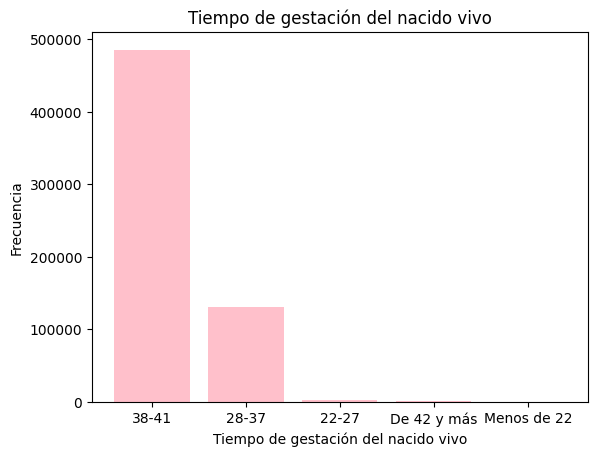

In [20]:
x_values = df2.T_GES.unique()
y_values = df2.T_GES.value_counts().tolist()
plt.bar(x_values, y_values, color = "pink")
plt.title('Tiempo de gestación del nacido vivo')
ax = plt.subplot()  # Axis
ax.set_xlabel('Tiempo de gestación del nacido vivo')
ax.set_ylabel('Frecuencia')
plt.show()

Aproximadamente el 78.38% de las niños de recién nacidos en Colombia tienen tiempo de gestación entre 38 y 41 semanas, el 21.07% entre 28 y 37 semanas, el 0.36% entre 22 y 27 semanas, el 0.19% entre 42 y más semanas, el 0.005% menos de 21 semanas.

In [21]:
sizes = np.array(y_values)
sizes

array([485433, 130485,   2236,   1163,     28])

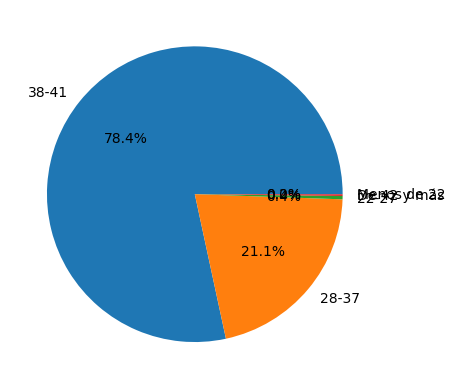

In [22]:
plt.pie(y_values, labels = x_values, autopct='%1.1f%%')
plt.show()

In [23]:
porcentaje = [(x/len(df2.T_GES)*100) for x in y_values]
print(x_values)
print(porcentaje)

['38-41' '28-37' '22-27' 'De 42 y más' 'Menos de 22']
[78.37844819930734, 21.068225302537357, 0.3610265683908, 0.18777902461471394, 0.004520905149795348]


In [24]:
df2.loc[(df2.TALLA_NAC == "1"), "TALLA_NAC"] = "Menos de 20"
df2.loc[(df2.TALLA_NAC == "2"), "TALLA_NAC"] = "20-29"
df2.loc[(df2.TALLA_NAC == "3"), "TALLA_NAC"] = "30-39"
df2.loc[(df2.TALLA_NAC == "4"), "TALLA_NAC"] = "40-49"
df2.loc[(df2.TALLA_NAC == "5"), "TALLA_NAC"] = "50-59"
df2.loc[(df2.TALLA_NAC == "6"),"TALLA_NAC"] = "60 y Más."
df2.head(5)

,T_GES,TALLA_NAC
COD_DPTO,,
52,38-41,40-49
20,38-41,50-59
27,38-41,50-59
27,38-41,40-49
27,38-41,50-59


Se cambian el nombre de los datos "1,2,3,4,5,6" de la variable talla de nacido vivo para los nombres "menos de 20, 20-29, 30-39,40-49,50-59, 60 y más" según el diccionario de datos.

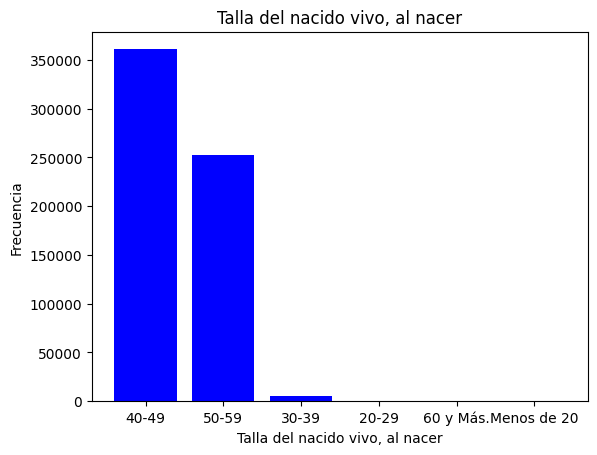

In [25]:
x_values = df2.TALLA_NAC.unique()
y_values = df2.TALLA_NAC.value_counts().tolist()
plt.bar(x_values, y_values, color = "blue")
plt.title('Talla del nacido vivo, al nacer')
ax = plt.subplot()  # Axis
ax.set_xlabel('Talla del nacido vivo, al nacer')
ax.set_ylabel('Frecuencia')
plt.show()

In [ ]:
sizes = np.array(y_values)
sizes

array([361010, 252113,   5695,    411,    114,      2])

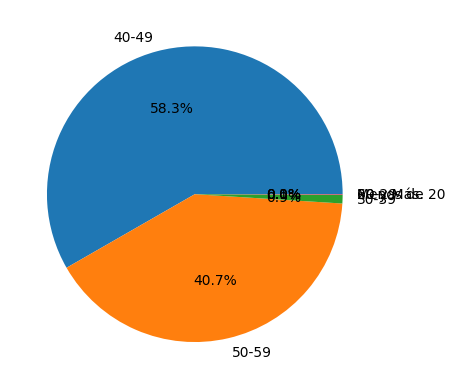

In [26]:
plt.pie(y_values, labels = x_values, autopct='%1.1f%%')
plt.show()

Aproximadamente el 58.29% de las niños de recién nacidos en Colombia tallan entre 40 y 49, el 40.71% entre 50 y 59, el 0.92% entre 30 y 39, el 0.07% entre 20 y 29, el 0.02% entre 60 y más y el 0.0003% menos de 20.

In [ ]:
len(df2.TALLA_NAC)

619345

In [ ]:
len(df2.T_GES)

619345

In [ ]:
porcentaje = [(x/len(df2.TALLA_NAC)*100) for x in y_values]
print(x_values)
print(porcentaje)

['40-49' '50-59' '30-39' '20-29' '60 y Más.' 'Menos de 20']
[58.28899886170067, 40.706391429655525, 0.9195198152887324, 0.06636042916306743, 0.018406542395595346, 0.00032292179641395344]


#Tablas de contingencia

*   Representación gráfica de una tabla de contingencia
*   Proporciones asociadas a una tabla de contingencia



In [ ]:
df2.loc[(df2.T_GES == 1), "T_GES"], df2.loc[(df2.T_GES == 2), "T_GES"], df2.loc[(df2.T_GES == 3), "T_GES"], df2.loc[(df2.T_GES == 4), "T_GES"], df2.loc[(df2.T_GES == 5), "T_GES"] = "Menos de 22", "22 a 27", "28 a 37","38 a 41","42 y más"
df2.loc[(df2.TALLA_NAC == 1), "TALLA_NAC"], df2.loc[(df2.TALLA_NAC == 2), "TALLA_NAC"], df2.loc[(df2.TALLA_NAC == 3), "TALLA_NAC"], df2.loc[(df2.TALLA_NAC == 4), "TALLA_NAC"], df2.loc[(df2.TALLA_NAC == 5), "TALLA_NAC"], df2.loc[(df2.TALLA_NAC == 6), "TALLA_NAC"] = "Menos de 20", "20 a 29", "30 a 39","40 a 49","50 a 59", "60 y Más."
df2.T_GES, df2.TALLA_NAC = df2.T_GES.astype(str), df2.TALLA_NAC.astype(str)
df2.head(3)

<ipython-input-39-16b3767e57e8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.T_GES, df2.TALLA_NAC = df2.T_GES.astype(str), df2.TALLA_NAC.astype(str)


,T_GES,TALLA_NAC
COD_DPTO,,
52,38-41,40-49
20,38-41,50-59
27,38-41,50-59



*  Se cambian el nombre de los datos "1,2,3,4,5,6" de la variable Tiempo de gestación para los nombres "menos de 22, 22-27,28-37,38-41,42 y más, y NA" según el diccionario de datos.  
*   Se cambian el nombre de los datos "1,2,3,4,5,6" de la variable talla de nacido vivo para los nombres "menos de 20, 20-29, 30-39,40-49,50-59, 60 y más" según el diccionario de datos.



In [ ]:
tabla_cont = pd.crosstab(df2.TALLA_NAC, df2["T_GES"])
tabla_cont

T_GES,22-27,28-37,38-41,De 42 y más,Menos de 22
TALLA_NAC,,,,,
20-29,260,53,76,0,22
30-39,1872,3619,198,0,6
40-49,102,89212,162543,256,0
50-59,0,37593,322515,902,0
60 y Más.,0,8,101,5,0
Menos de 20,2,0,0,0,0


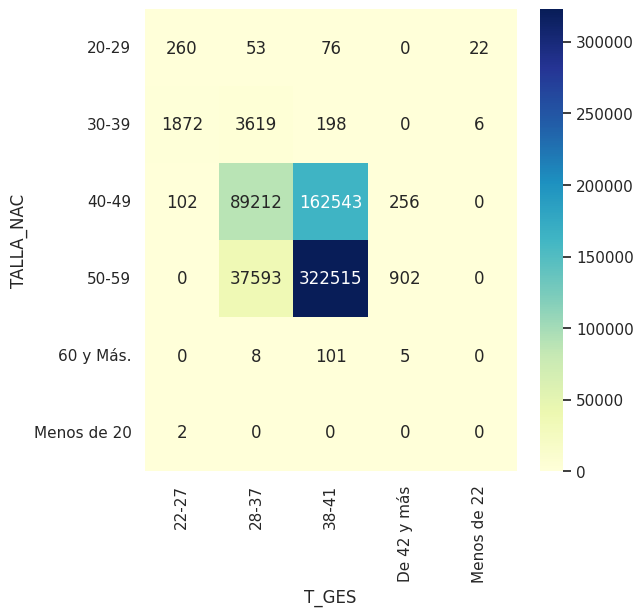

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(6, 6))
heatmap = sns.heatmap(tabla_cont,  annot=True, fmt='d', cmap='YlGnBu', cbar=True)
plt.show()

Probabilidades condicionales:


In [ ]:
res = stats.chi2_contingency(tabla_cont)
chi, valor_p, _, _ = res
print(f"El valor de la estadística Chi cuadrado es {chi} y el valor p es d {valor_p}")

El valor de la estadística Chi cuadrado es 305687.20323918184 y el valor p es d 0.0


Se hace una prueba de hipotesis de independencia:
La hipotesis es que las variables talla del nacido vivo y el tiempo de gestacón son independientes.

Como el valor p es de 0.0 se rechaza la hipótesis nula, es decir, las variables talla del nacido vivo y el tiempo de gestacón no son independientes.


In [ ]:
import math
coeficiente_contingencia = math.sqrt(chi/(chi + len(df2.T_GES)))
coeficiente_phi = math.sqrt(chi/len(df2.T_GES))
coeficiente_v_cramer = math.sqrt(chi/(len(df2.T_GES)*min(6-1, 5-1)))
print(f"Los coeficientes de contingencia, Phi y V de Cramer están respectivamente dados por {coeficiente_contingencia}, {coeficiente_phi} y {coeficiente_v_cramer}")

Los coeficientes de contingencia, Phi y V de Cramer están respectivamente dados por 0.5748575017974198, 0.7025420300976799 y 0.35127101504883995


La talla del nacido al nacer depende el tiempo de gestación.
Coeficientes de contingencia 0.5748575017974198 es moderado
Coeficientes de Phi 0.7025420300976799 es sustancial
coeficientes de Cramer 0.35127101504883995 es discreto

# Probabilidades de la intersección.


*   Probabilidad de que un nacido vivo tenga talla de 20 a 29 y el tiempo de gestación sea de 22 a 27 semanas.
260/619345 = 0.00041

*   Probabilidad de que un nacido vivo tenga talla de 30 a 39 y el tiempo de gestación sea de 22 a 27 semanas.
1872/619345 = 0.0030

*   Probabilidad de que un nacido vivo tenga talla de 20 a 29 y el tiempo de gestación sea de 28 a 37 semanas.
53/619345 = 0.000085


*   Probabilidad de que un nacido vivo tenga talla de 30 a 39 y el tiempo de gestación sea de 28 a 37 semanas.
3619/619345 = 0.005

*   Probabilidad de que un nacido vivo tenga talla de 30 a 39 y el tiempo de gestación sea de 28 a 37 semanas.
89212/619345 = 0.144

El 14% nace coon talla de 30 a 39 y el tiempo y con tiempo de gestación de 28 a 37 semanas.

*  Probabilidad de que un nacido vivo tenga talla de 50 a 59 y el tiempo de gestación sea de 28 a 37 semanas.
37593/619345 = 0.060697

* Probabilidad de que un nacido vivo tenga talla de 60 y más y el tiempo de gestación sea de 28 a 37 semanas.
8/619345 = 0.00012

* Probabilidad de que un nacido vivo tenga talla de 20 a 29 y el tiempo de gestación sea de 38 a 41 semanas.
76/619345 = 0.00012

*  Probabilidad de que un nacido vivo tenga talla de 30 a 39 y el tiempo de gestación sea de 38 a 41 semanas.
198/619345 = 0.00031

* Probabilidad de que un nacido vivo tenga talla de 40 a 49 y el tiempo de gestación sea de 38 a 41 semanas.  

162543/619345 = 0.26244
El 26% nace con talla de 40 a 49 y el tiempo y con tiempo de gestación de 38 a 41 semanas.

* Probabilidad de que un nacido vivo tenga talla de 50 a 59 y el tiempo de gestación sea de 38 a 41 semanas.
322515/619345 = 0.52073
El 52% nace con talla de 50 a 59 y el tiempo y con tiempo de gestación de 38 a 41 semanas.

*  Probabilidad de que un nacido vivo tenga talla de 60 y más y el tiempo de gestación sea de 38 a 41 semanas.
101/619345 = 0.00016

*   Probabilidad de que un nacido vivo tenga talla de 40 a 49 y el tiempo de gestación sea de 42 y más semanas.
256/619345 = 0.00041


*  Probabilidad de que un nacido vivo tenga tiempo de gestación sea de 42 y más semanas y tenga talla de 50 a 59.
902/619345 = 0.00145

*  Probabilidad de que un nacido vivo tenga tiempo de gestación sea de 42 y más semanas y tenga talla de 60 y más.
5/61934 = 0.000008

*  Probabilidad de que un nacido vivo tenga tiempo de gestación en menos de 22 semanas y más semanas y tenga talla de 20-29.
22/619345 = 0.00003

*  Probabilidad de que un nacido vivo tenga tiempo de gestación en menos de 22 semanas y más semanas y tenga talla de 30-39.
6/619345 = 0.0000096














# Probabilidades condicionales.
*   Probabilidad de que tenga de 22-27 Semanas si se sabe que talla 20-29
260/411= 0.632 La probabilidad es 63.2%
*   Probabilidad de que tenga de 28-37 Semanas si se sabe que talla 20-29
53/411= 0.1289  La probabilidad es de 12.89%
*   Probabilidad de que tenga de 38-41 Semanas si se sabe que talla 20-29
76/411= 0.1849 la probabilidad es de 18.49%
*   Probabilidad de que tenga de menos de 22 Semanas de gestación si se sabe que talla 20-29
*   22/411= 0.053 La probabilidad es de 5.35
*   Probabilidad de que tenga de 22-27 Semanas si se sabe que mide 30-39
1872/5695=0.32870 La probabilidad es de 32.87%
*   Probabilidad de que tenga de 28-37 semanas si se sabe que mide 30-39
3619/5695=0.6354 La probabilidad es de 63.54
*   Probabilidad de que tenga de 38-41 semanas si se sabe que mide 30-39
198/5695=0.03476 La probabilidad es de 3.47%
*   Probabilidad de que tenga de 22 semanas si se sabe que mide 30-39
6/5695=0.0010
*   Probabilidad de que tenga de 22-27 si se sabe que mide 40-49
102/252113=0.00040
*   Probabilidad de que tenga de 28-37 si se sabe que mide 40-49
89212/252113=0.3558 La probade 35.38bilidad es %
* Probabilidad de que tenga de  38-41 semanas si se sabe que mide 40-49
162543/252113=0.6447 La probabilidad es de 64.47%
*  Probabilidad de que tenga de 42 y más semanas si se sabe que mide 40-49
256/252113=0.0010
*  Probabilidad de que tenga de 28-37 semanas si se sabe que mide 50-59
37593/361010=0.1041 La probabilidad es 10.41%
*   Probabilidad de que tenga de 38-41 semanas si se sabe que mide 50-59
322515/361010= 0.8933 La probabilidad es de 89.33%
*   Probabilidad de que tenga de 42 y más semanas si se sabe que mide 50-59
902/361010=0.0024
*     Probabilidad de que tenga de 28-37 semanas si se sabe que mide 60 y más
8/114=0.070
*   Probabilidad de que tenga de 38-41 semanas si se sabe que mide 60 y más
101/114=0.8859 La probabilidad es de 88.59%
*  Probabilidad de que tenga de 42 y más semanas si se sabe que mide 60 y más
5/114= 0.04385 La probabilidad es de 4.28%




# Contexto

Según el artículo Paredes Lascano, P., & Calle Miñaca, A. (2011), , la talla del recién nacido depende del tiempo de gestación debido a una correlación significativa entre la edad gestacional y el peso del recién nacido. A medida que aumenta la edad gestacional, también aumenta el peso del recién nacido, lo cual indica que el tiempo de gestación es un factor crucial en el desarrollo del bebé. Esta relación ha sido cuantificada y se considera altamente significativa con un valor de p<0, 01, lo que significa que es muy poco probable que esta relación sea debida al azar.
El estudio mencionado en el artículo analizó 1,220 recién nacidos de madres sin patologías que pudieran afectar el crecimiento fetal, encontrando que una mayor duración de la gestación permite un mayor desarrollo y crecimiento del feto. Este crecimiento continuo en el útero contribuye a un mayor peso y, por ende, una mayor talla al momento del nacimiento. Además, se observó que otros factores, como la talla de la madre, también influyen en el peso del recién nacido, pero la edad gestacional sigue siendo un determinante clave.

El artículo subraya la importancia del peso al nacer como un indicador crucial de la salud neonatal, ya que los bebés con mayor peso al nacer tienden a tener menos complicaciones de salud y una mayor supervivencia. Por otro lado, los bebés con bajo peso al nacer (menos de 2,500 gramos) tienen un mayor riesgo de problemas de salud tanto a corto como a largo plazo.

En resumen, la talla del recién nacido al nacer depende del tiempo de gestación porque una mayor duración de la gestación permite un desarrollo más completo y un mayor peso del feto, lo que se traduce en una mayor talla al nacer. Esta relación es altamente significativa y subraya la importancia de un periodo de gestación adecuado para el desarrollo saludable del bebé.

Referencia
Paredes Lascano, P., & Calle Miñaca, A. (2011). Cómo influyen la talla materna y diversos factores en el peso del recién nacido. Boletín de la Sociedad de Pediatría de Asturias, Cantabria, Castilla y León, 51, 53-59.

# Preguntas

**¿Cómo se comporta la variable tiempo de gestación de un nacido vivo en Colombia (T_GES)?**

La variable tiempo de gestación (T_GES) de un nacido vivo en Colombia muestra una distribución principalmente centrada en el rango considerado normal para un embarazo a término. Aproximadamente el 78.38% de los recién nacidos en Colombia tienen un tiempo de gestación entre 38 y 41 semanas. Este grupo constituye la mayoría de los nacimientos y representa el período estándar de gestación.

Un 21.07% de los nacimientos ocurren entre las 28 y 37 semanas de gestación, clasificándose como nacimientos prematuros. Estos casos son relativamente comunes y reflejan la proporción de nacimientos que ocurren antes de las 38 semanas completas.

Los nacimientos muy prematuros, aquellos con un tiempo de gestación entre 22 y 27 semanas, representan un 0.36% de los casos.

Un pequeño porcentaje de recién nacidos, el 0.19%, tienen un tiempo de gestación de 42 semanas o más, lo que se conoce como postérmino.

Finalmente, un porcentaje extremadamente bajo, el 0.005%, corresponde a nacimientos con menos de 21 semanas de gestación.

En resumen, la mayor parte de los nacimientos en Colombia ocurre dentro del rango de gestación a término, con una proporción significativa de nacimientos prematuros y muy pocos casos de gestación postérmino o extremadamente prematuros.

 **¿Cómo se comporta la variable talla de nacimiento de un nacido vivo en Colombia
(TALLA_NAC)?**

La variable talla de nacimiento de un nacido vivo en Colombia (TALLA_NAC) muestra una distribución que se concentra en ciertos rangos de tamaño, con la mayoría de los recién nacidos situándose en un rango específico. Aproximadamente el 58.29% de los recién nacidos en Colombia tienen una talla entre 40 y 49 centímetros, lo que indica que este es el rango de talla más común entre los nacidos vivos en el país.

Un 40.71% de los recién nacidos tienen una talla entre 50 y 59 centímetros, lo cual representa el segundo grupo más grande. Estas tallas también son típicas para los recién nacidos a término, aunque son ligeramente más altos que el grupo mayoritario.

Un pequeño porcentaje, el 0.92%, de los recién nacidos tienen una talla entre 30 y 39 centímetros. Estos casos son menos frecuentes y pueden estar asociados con nacimientos prematuros o con ciertas condiciones médicas que afectan el crecimiento fetal.

El 0.07% de los recién nacidos tienen una talla entre 20 y 29 centímetros. Estas tallas son muy poco comunes y generalmente indican nacimientos extremadamente prematuros o con problemas de desarrollo significativo.

Un mínimo porcentaje, el 0.02%, corresponde a recién nacidos con una talla de 60 centímetros o más. Estos casos son raros y suelen estar asociados con condiciones excepcionales de crecimiento intrauterino.

Finalmente, un porcentaje extremadamente bajo, el 0.0003%, tiene una talla de menos de 20 centímetros, lo cual es sumamente raro y generalmente no es viable debido a la falta de desarrollo suficiente del feto.

En resumen, la mayoría de los recién nacidos en Colombia tienen una talla que cae entre 40 y 49 centímetros, con una significativa proporción también entre 50 y 59 centímetros. Las tallas fuera de estos rangos son mucho menos comunes y están asociadas con condiciones específicas de nacimiento.

**¿Alguna variable depende de la otra, o, están asociadas? ¿Qué tan dependiente es una
variable de la otra o qué tan asociadas están ambas?**

La talla del nacido vivo en Colombia muestra una relación significativa con el tiempo de gestación, según los datos analizados. Esto indica que el tiempo que un bebé pasa en gestación afecta directamente a su talla al momento del nacimiento. Los coeficientes de asociación respaldan esta observación: el coeficiente de contingencia muestra una asociación moderada (0.5748575017974198), el coeficiente de Phi indica una asociación sustancial (0.7025420300976799), y el coeficiente de Cramer refleja una asociación discreta (0.35127101504883995).

Además, se realizó una prueba de hipótesis para determinar la independencia entre la talla del recién nacido y el tiempo de gestación. Con un valor p de 0.0, se rechaza la hipótesis nula de independencia. Esto confirma que las variables no son independientes, corroborando que el tiempo de gestación ejerce una influencia significativa sobre la talla del nacido vivo en Colombia.

# Conclusiones
La relación entre la talla del recién nacido al nacer y el tiempo de gestación en Colombia es significativa y está bien establecida. Según datos y estudios relevantes, el tiempo que un bebé pasa en gestación influye directamente en su talla al nacer. En general, los bebés que tienen una gestación más prolongada suelen tener una mayor talla al nacer, mientras que los bebés nacidos prematuramente tienden a tener tallas más pequeñas.

Esto se refleja en los coeficientes de asociación calculados: el coeficiente de contingencia muestra una asociación moderada (0.5748575017974198), el coeficiente de Phi indica una asociación sustancial (0.7025420300976799), y el coeficiente de Cramer refleja una asociación discreta pero significativa (0.35127101504883995). Además, la prueba de hipótesis realizada confirma que la talla del recién nacido y el tiempo de gestación no son variables independientes, con un valor p de 0.0, lo que indica una dependencia significativa entre ambas variables.

El artículo mencionado de Paredes Lascano y Calle Miñaca (2011) respalda esta relación al destacar la correlación positiva entre la edad gestacional y el peso del recién nacido. A medida que aumenta la duración de la gestación, también aumenta el desarrollo y crecimiento del feto, lo cual se traduce en una mayor talla al momento del nacimiento.

La talla del recién nacido en Colombia depende significativamente del tiempo de gestación. Un periodo gestacional más largo permite un desarrollo más completo y, por lo tanto, una mayor talla al nacer, lo cual subraya la importancia de una gestación completa y saludable para el bienestar del bebé.
